In [1]:
import pandas as pd
df= pd.DataFrame(pd.read_table('ospC-NE.diff'))
df

,seq_1,seq_2,len_gapless,len_variable,diff_gapless,diff_variable,len_aln,identitty,fac_diff,frac_gapless,frac_variable
0,A,B,209,115,40,43,217,80.8612,0.1914,0.1914,0.3739
1,A,C,209,115,38,40,217,81.8182,0.1818,0.1818,0.3478
2,A,D,210,115,47,48,217,77.6190,0.2238,0.2238,0.4174
3,A,E,209,115,55,56,217,73.6842,0.2632,0.2632,0.4870
4,A,F,208,115,47,50,217,77.4038,0.2260,0.2260,0.4348
...,...,...,...,...,...,...,...,...,...,...,...
115,M,T,212,115,46,47,217,78.3019,0.2170,0.2170,0.4087
116,M,U,210,115,44,49,217,79.0476,0.2095,0.2095,0.4261
117,N,T,211,115,54,56,217,74.4076,0.2559,0.2559,0.4870
118,N,U,209,115,52,58,217,75.1196,0.2488,0.2488,0.5043


In [4]:
from scipy import sparse
import numpy as np
def create_dict(df):  
        translator =  {}
        counter = 0
        for index, row in df.iterrows():
            if row[0] not in translator.keys():
                translator[row[0]]=counter
                counter+=1
            else:
                continue
        
        translator['U']=counter
        return translator
translator = create_dict(df)


def adjacency_matrix(df, translator):
   
            dicter = {} #for fractional variability
            dicter_two = {} #fractonal gapless
    
            for index, val in df.iterrows():
    
                dicter[translator[val[0]],translator[val[1]]]=val[10]
                dicter[translator[val[1]],translator[val[0]]]=val[10]
                dicter_two[translator[val[0]],translator[val[1]]]=val[9]
                dicter_two[translator[val[1]],translator[val[0]]]=val[9]
    
            return dicter, dicter_two
dicter , dicter_two = adjacency_matrix(df, translator)

def create_numpy_matrix(translator, dicter):
        a_shape = (len(translator),len(translator))
        a= np.zeros(a_shape)
        for i,j in dicter:
              a[i,j]=dicter[i,j]
              a[i,i]=1
        
        return a
    
numpy_matrix_form_frac_variable = create_numpy_matrix(translator, dicter)
numpy_matrix_form_frac_gapless = create_numpy_matrix(translator, dicter_two)

In [5]:
import numpy as np
eigenvalues, eigenvectors = np.linalg.eig(numpy_matrix_form_frac_variable)
print("THIS IS FOR FRACTIONAL VARIABILITY FEATURE :::")
print(" The eigenvalues are : \n", eigenvalues)
print(" The eigenvectors are : \n", eigenvectors)

THIS IS FOR FRACTIONAL VARIABILITY FEATURE :::
 The eigenvalues are : 
 [7.95222044 0.15070897 0.16906328 0.32329989 0.78749116 0.76620614
 0.45382727 0.48078947 0.51457956 0.70527126 0.55093766 0.57060548
 0.60661617 0.63039793 0.6659203  0.67206502]
 The eigenvectors are : 
 [[-0.23468673  0.18076714  0.18038592  0.03210421 -0.02433174  0.04307591
   0.20768003 -0.35673453  0.12201379  0.55004018  0.06567967 -0.1594044
   0.33922813  0.19813869 -0.44189965  0.09524923]
 [-0.25446338  0.33608278  0.29321642  0.24954301 -0.2057166   0.17395351
  -0.20216196  0.09739891  0.18860246 -0.48108965 -0.27675003 -0.00845678
   0.3436998  -0.18951441 -0.1737083  -0.15236122]
 [-0.23167685  0.36168575  0.17062311 -0.04377833  0.37959345 -0.5762668
  -0.17341399  0.09093523  0.11780675 -0.17780669  0.36835215 -0.03627873
  -0.02717838  0.17361218  0.08905088  0.22059286]
 [-0.25053552 -0.01076405 -0.01990572  0.34223981  0.23466428 -0.30391724
   0.54599121  0.04762849 -0.17965744 -0.00208449 -0.

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(numpy_matrix_form_frac_gapless)
sorted_eigenvalues = sorted(eigenvalues)
eigenvalues_spacing = []

for i in range(len(eigenvalues)-1):
    eigenvalues_spacing.append(abs(eigenvalues[i]-eigenvalues[i+1]))

print("THIS IS FOR FRACTIONAL GAPLESS FEATURE :::")
print(" The eigenvalues are : \n", eigenvalues)
print(" The eigenvectors are : \n", eigenvectors)
print("The sorted eigenvalues are: \n", sorted_eigenvalues)
print("The spacings between each eigenvalue are: \n", eigenvalues_spacing)
    

THIS IS FOR FRACTIONAL VARIABILITY FEATURE :::
 The eigenvalues are : 
 [4.62001664 0.54665329 0.58903494 0.64382797 0.88731551 0.87511851
 0.71488272 0.7301235  0.84841829 0.74162582 0.83421254 0.82452256
 0.80496747 0.79822066 0.76636671 0.77469286]
 The eigenvectors are : 
 [[-0.23497941  0.23059668 -0.13076704  0.09395629 -0.00825988  0.0377304
  -0.08792693 -0.44961491 -0.54452417 -0.02970266 -0.4689886   0.14867285
   0.13768683 -0.30490958 -0.05032501 -0.02006649]
 [-0.25352855  0.37206908 -0.20863193  0.22021435 -0.21703868 -0.23389282
   0.25678665  0.1349727   0.41522995 -0.21999324 -0.05620256 -0.21515036
  -0.02346332 -0.44879702  0.17877244  0.12291202]
 [-0.23397745  0.27877428 -0.31117075 -0.09266264  0.36407685  0.53510306
   0.1176993   0.04466171  0.29359469 -0.11587124  0.0431333   0.23027561
   0.14110582  0.11297822 -0.29361127 -0.23237252]
 [-0.25372168 -0.01952562  0.06737302  0.43807541  0.22079723  0.321597
  -0.45443089  0.08656942  0.06679288  0.10669989  0.0

In [11]:
'''I fixed the negative eigenvalues by making the diagonal values equal to 1.\nNow the eigenvalues are positive.\nIn one of the random matrix theory papers I read they mentioned how finding \n appropriates values for the diagonal is the key for stabilizing the matrix. This logic\ncombined with the simple maths of how eigenvalues are calculated made the 1 on\nthe diagonal seem plausible. \nWhat should be noted is that it says all sequences with A<->A , B<->B, C<->C,...,U<->U  \nhas a fractional variablility of 1. This could be incorrect based on what the \nfractional variablitiy feature actually means for the seuqences. \n\nAs for why the first eigenvalue is so much larger than the rest. I still do not have\nmuch understanding of this. But after doing some reading it says that real symmetric\nmatrices with random values as entries have exactly one large eigenvalue.\n\nIf you look at the code below then it can be verified that the matrix is symmetric. \nIt can also be verified that the matrix does have random values. Therefore, \nmaking the leading eigenvector much larger than the rest.\n'''

'I fixed the negative eigenvalues by making the diagonal values equal to 1.\nNow the eigenvalues are positive.\nIn one of the random matrix theory papers I read they mentioned how finding \n appropriates values for the diagonal is the key for stabilizing the matrix. This logic\ncombined with the simple maths of how eigenvalues are calculated made the 1 on\nthe diagonal seem plausible. \nWhat should be noted is that it says all sequences with A<->A , B<->B, C<->C,...,U<->U  \nhas a fractional variablility of 1. This could be incorrect based on what the \nfractional variablitiy feature actually means for the seuqences. \n\nAs for why the first eigenvalue is so much larger than the rest. I still do not have\nmuch understanding of this. But after doing some reading it says that real symmetric\nmatrices with random values as entries have exactly one large eigenvalue.\n\nIf you look at the code below then it can be verified that the matrix is symmetric. \nIt can also be verified that the mat

In [13]:
#eigenvalues, eigenvectors = np.linalg.eig(numpy_matrix_form)
sorted_eigenvalues = sorted(eigenvalues)
eigenvalues_spacing = []
for i in range(len(eigenvalues)-1):
        eigenvalues_spacing.append(abs(eigenvalues[i]-eigenvalues[i+1]))
    
print("THIS IS FOR FRACTIONAL GAPLESS FEATURE:::")
print(" The eigenvalues are : \n", eigenvalues)
print(" The eigenvectors are : \n", eigenvectors)
print("The sorted eigenvalues are: \n", sorted_eigenvalues)
print("The spacings between each eigenvalue are: \n", eigenvalues_spacing)

THIS IS FOR FRACTIONAL GAPLESS FEATURE:::
 The eigenvalues are : 
 [4.62001664 0.54665329 0.58903494 0.64382797 0.88731551 0.87511851
 0.71488272 0.7301235  0.84841829 0.74162582 0.83421254 0.82452256
 0.80496747 0.79822066 0.76636671 0.77469286]
 The eigenvectors are : 
 [[-0.23497941  0.23059668 -0.13076704  0.09395629 -0.00825988  0.0377304
  -0.08792693 -0.44961491 -0.54452417 -0.02970266 -0.4689886   0.14867285
   0.13768683 -0.30490958 -0.05032501 -0.02006649]
 [-0.25352855  0.37206908 -0.20863193  0.22021435 -0.21703868 -0.23389282
   0.25678665  0.1349727   0.41522995 -0.21999324 -0.05620256 -0.21515036
  -0.02346332 -0.44879702  0.17877244  0.12291202]
 [-0.23397745  0.27877428 -0.31117075 -0.09266264  0.36407685  0.53510306
   0.1176993   0.04466171  0.29359469 -0.11587124  0.0431333   0.23027561
   0.14110582  0.11297822 -0.29361127 -0.23237252]
 [-0.25372168 -0.01952562  0.06737302  0.43807541  0.22079723  0.321597
  -0.45443089  0.08656942  0.06679288  0.10669989  0.011373

In [14]:
def transposeMatrix(inputMatrix, t, rows):

          for p in range(rows):
            
             for q in range(rows):
             
                   t[p][q] = inputMatrix[q][p]
    
def checkingSymmetric(inputMatrix, rows):
    
          t = [[0 for q in range(len(inputMatrix[0]))]
             for p in range(len(inputMatrix))]
         
          transposeMatrix(inputMatrix, t, rows)
    
          for p in range(rows):
           
             for q in range(rows):
              
                   if (inputMatrix[p][q] != t[p][q]):
                   
                      return False
    
          return True
      
if (checkingSymmetric(numpy_matrix_form_frac_gapless, 16)):
       print("Input matrix is a Symmetric matrix")
else:
       print("Input matrix is NOT a Symmetric matrix")
       
if (checkingSymmetric(numpy_matrix_form_frac_variable, 16)):
       print("Input matrix is a Symmetric matrix")
else:
       print("Input matrix is NOT a Symmetric matrix")  
       
    #fair to assume that this is gaussian orthogonal ensemble"

Input matrix is a Symmetric matrix
Input matrix is a Symmetric matrix


In [19]:
eigenvalues=np.sort(eigenvalues)[::-1]
#print(min(new_eigenvalues))
    
def rescaling(eigenvalues):
        new_eigenvalues=[]
        for i in eigenvalues:
            new_i=(len(eigenvalues)*(i- min(eigenvalues)))/(max(eigenvalues)-min(eigenvalues))
            new_eigenvalues.append(new_i)
        
        newer_eigenvalues = np.sort(new_eigenvalues)[::-1]
       
        return newer_eigenvalues
    
eigenvalues_s_s=rescaling(eigenvalues)
    
eigenvalues=np.sort(eigenvalues)[::-1]
print(eigenvalues)

print('\n')
    
print(eigenvalues_s_s)
print('\n')
print(' As can be seen, the scaled version of the eigenvalue is a mess. Instead of getting scaled it seems to have gotten even more complex.')

print("\n Texts do not do a good job of stating what adjacent or neighboring eigenvalues are. For the purpose of this test I am going to assume that what is meant is adjacent eigenvalues are eigenvalues that are consecutive") 

    

[4.62001664 0.88731551 0.87511851 0.84841829 0.83421254 0.82452256
 0.80496747 0.79822066 0.77469286 0.76636671 0.74162582 0.7301235
 0.71488272 0.64382797 0.58903494 0.54665329]


[16.          1.33810689  1.29019758  1.18532024  1.12952065  1.0914588
  1.01464726  0.98814608  0.89572986  0.86302507  0.76584391  0.7206633
  0.66079813  0.38169807  0.16647335  0.        ]


 As can be seen, the scaled version of the eigenvalue is a mess. Instead of getting scaled it seems to have gotten even more complex.

 Texts do not do a good job of stating what adjacent or neighboring eigenvalues are. For the purpose of this test I am going to assume that what is meant is adjacent eigenvalues are eigenvalues that are consecutive


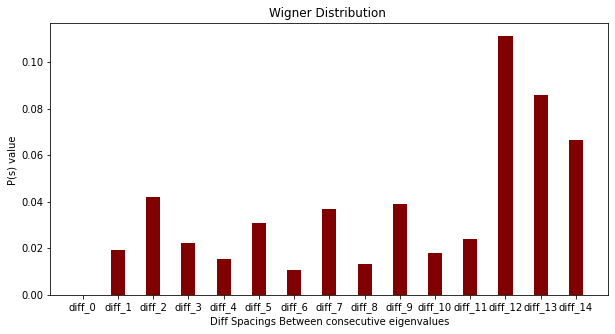

In [22]:
import math
import matplotlib.pyplot as plt
e= math.e
pi= math.pi


def s_values_consec(eigenvalues):
        s_values = []
        for i,j in enumerate(eigenvalues):
            if(i<len(eigenvalues)-1):
                s_values.append(j- eigenvalues[i+1])
        return s_values
    
s_vals = s_values_consec(eigenvalues)
#s_vals_two = s_values_consec(eigenvalues_s_s) #for sorted and scaled\n"

def wignerDist(s_vals):
        wigner_vals = []
        labels = []
        for x,i in enumerate(s_vals):
            val = -abs((pi*math.pow(i,2))/4)
            value = ((math.pi*(i))/2)*(math.pow(e,val))
            wigner_vals.append(value)
            labels.append("diff_{}".format(x))
        return wigner_vals, labels
wignerDistribution, labels = wignerDist(s_vals) #for non scaled version\n",
#wignerDistribution, labels = wignerDist(s_vals_two) #for scaled version\n",

fig = plt.figure(figsize = (10, 5))
    
plt.bar(labels, wignerDistribution, color ='maroon',width = 0.4)
    
plt.xlabel("Diff Spacings Between consecutive eigenvalues")
plt.ylabel("P(s) value ")
plt.title("Wigner Distribution ")
plt.show()
    
    

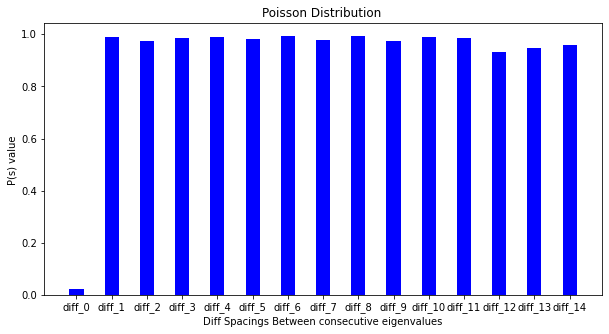

In [24]:
def poisson(s_vals):
        poisson_vals = []
        labels_ = []
        for x,i in enumerate(s_vals):
            value = (math.pow(e,-abs(i)))
            poisson_vals.append(value)
            labels_.append("diff_{}".format(x))
        return poisson_vals, labels_
poisson_vals, labels_ = poisson(s_vals)
#poisson_vals, labels_ = poisson(s_vals_two)
#print(poisson_vals)\n",
    
fig = plt.figure(figsize = (10, 5))
plt.bar(labels, poisson_vals, color ='blue',width = 0.4)
plt.xlabel("Diff Spacings Between consecutive eigenvalues")
plt.ylabel("P(s) value ")
plt.title("Poisson Distribution ")
plt.show()

[0.00010367151935763054, 9.682043085524182e-05, 8.329089871404891e-05, 7.684416161651195e-05, 7.272159169441902e-05, 6.503272322118415e-05, 6.256402063304e-05, 5.4633615543899655e-05, 5.2063598606387684e-05, 4.508821406501212e-05, 4.2157152269334826e-05, 3.855198563821434e-05, 2.5285018456317193e-05, 1.8161699074437774e-05, 1.4013329317069123e-05]


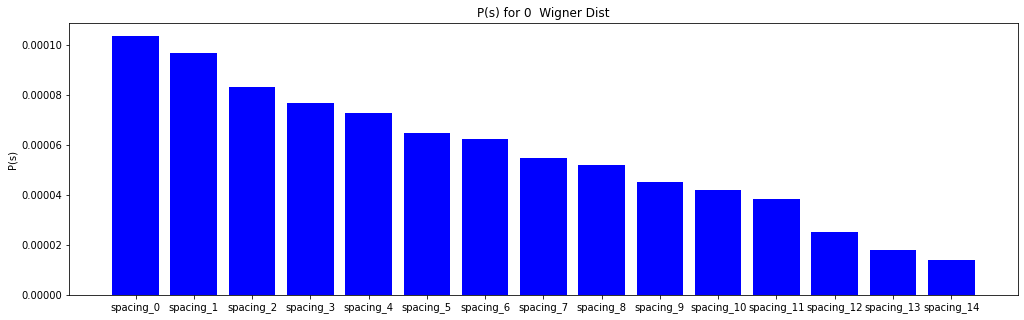

[0.00010367151935763054, 0.019156765940502623, 0.061027049650278616, 0.08322941222541563, 0.09832996460181843, 0.1286649033546668, 0.13908006774337547, 0.17515366168312205, 0.18781562635595697, 0.22506543842013157, 0.24217099584270999, 0.2646049499560562, 0.3650685768421457, 0.4369153053997518, 0.4884944431598471]


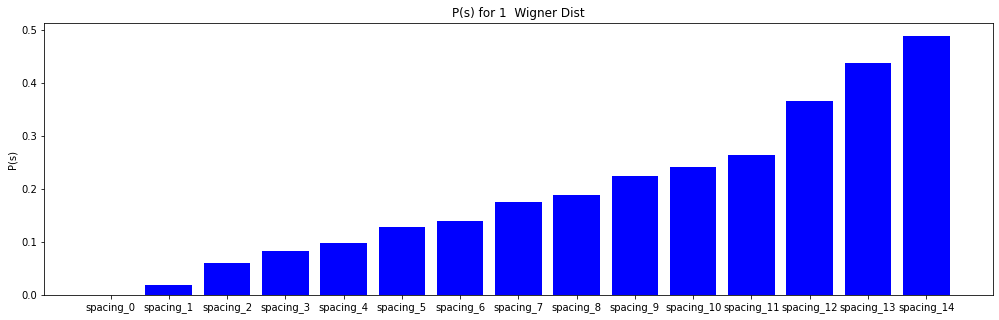

[9.682043085524182e-05, 0.019156765940502623, 0.04191713051731423, 0.06417055692625623, 0.07931630720465786, 0.1097679065114866, 0.1202311677612802, 0.15650365157547577, 0.16924749126821578, 0.20677544321728156, 0.22402779732447048, 0.2466730149670234, 0.34836202800156657, 0.42140176874033575, 0.4740332794795897]


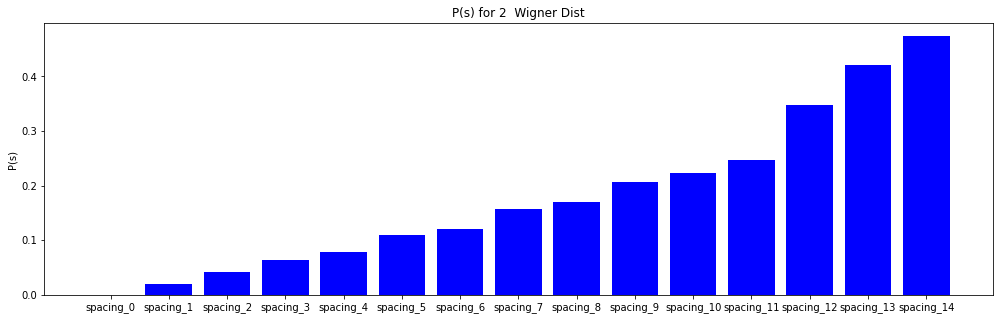

[8.329089871404891e-05, 0.061027049650278616, 0.04191713051731423, 0.022310802225524506, 0.03751850287702526, 0.06815125143001965, 0.07869435235488936, 0.11531430312704793, 0.12820661732410762, 0.16625336863806744, 0.18378595683311544, 0.20684000642646536, 0.3109766023589668, 0.38646774832072905, 0.44129397410213084]


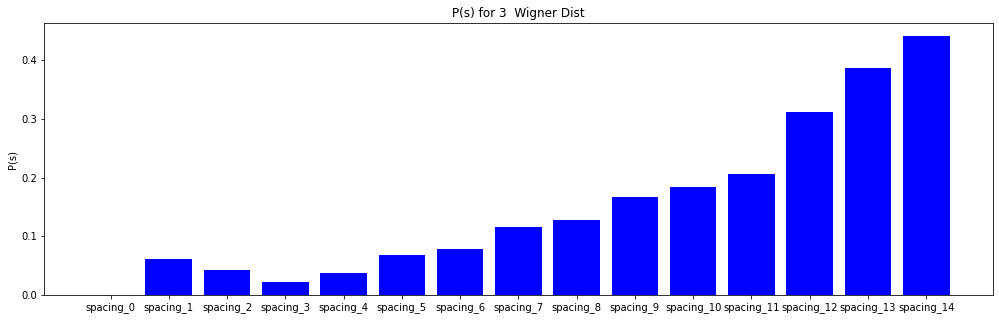

[7.684416161651195e-05, 0.08322941222541563, 0.06417055692625623, 0.022310802225524506, 0.015219871349941419, 0.045907195500663016, 0.05647841642948286, 0.09323352249148979, 0.10618740063018549, 0.1444590039123249, 0.16211726569390236, 0.18535820946567688, 0.2906619825460085, 0.36736417443789987, 0.4232939318385237]


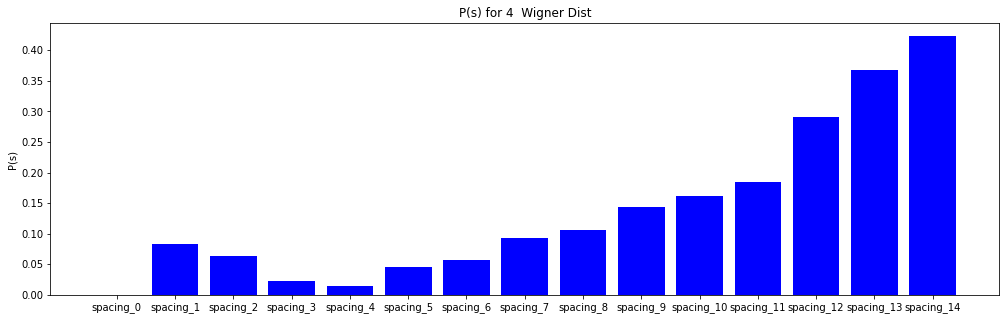

[7.272159169441902e-05, 0.09832996460181843, 0.07931630720465786, 0.03751850287702526, 0.015219871349941419, 0.030707825249393424, 0.041292472422898144, 0.07811980439558515, 0.09110866037122342, 0.1295129951035189, 0.14724750731560904, 0.1706035254768698, 0.27664836648101154, 0.35413819973207294, 0.41079397421840536]


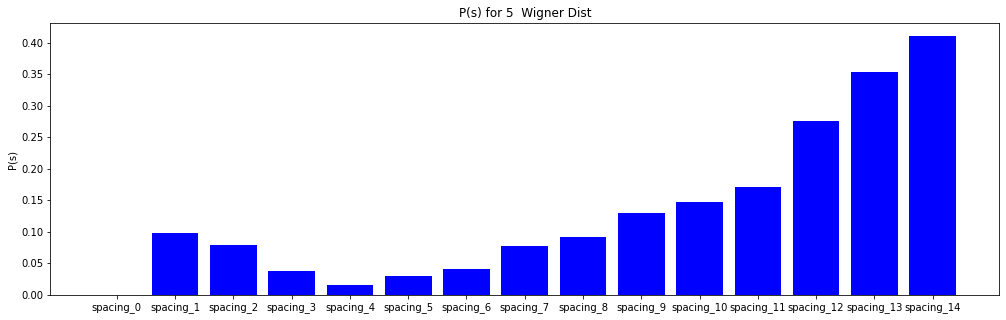

[6.503272322118415e-05, 0.1286649033546668, 0.1097679065114866, 0.06815125143001965, 0.045907195500663016, 0.030707825249393424, 0.010597485752725108, 0.04752102771112678, 0.060563028554684775, 0.09918380122377297, 0.11704854257216944, 0.1406057607107478, 0.24800764588316454, 0.32698950448642733, 0.38504209857255794]


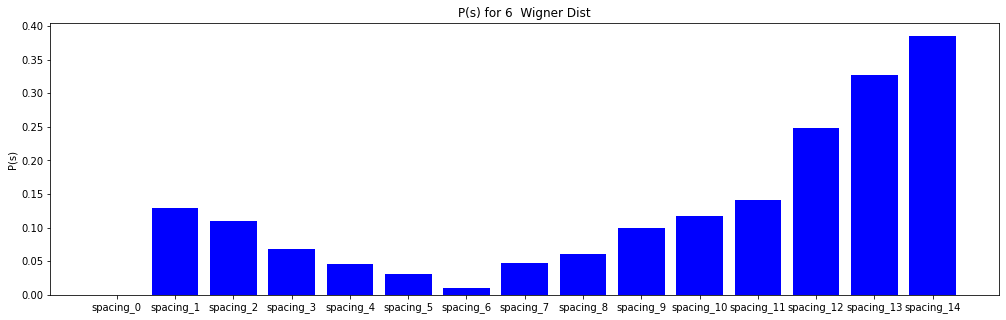

[6.256402063304e-05, 0.13908006774337547, 0.1202311677612802, 0.07869435235488936, 0.05647841642948286, 0.041292472422898144, 0.010597485752725108, 0.03694131959507545, 0.04999622075816493, 0.08867561805149635, 0.10657789615775104, 0.13019481726135146, 0.2380213562931886, 0.3174871099100694, 0.3759998458943047]


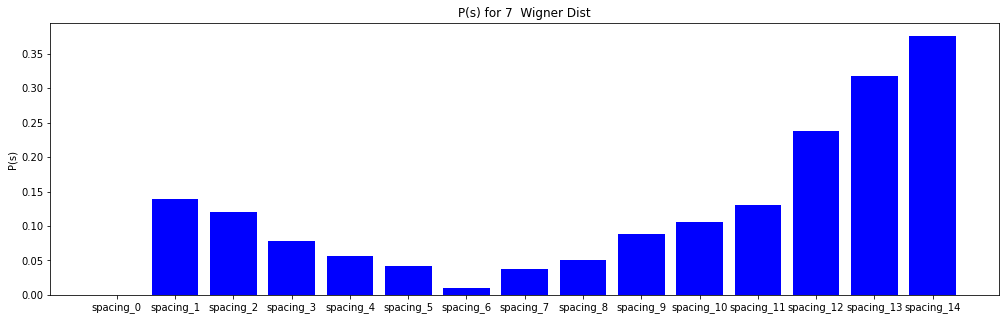

[5.4633615543899655e-05, 0.17515366168312205, 0.15650365157547577, 0.11531430312704793, 0.09323352249148979, 0.07811980439558515, 0.04752102771112678, 0.03694131959507545, 0.013077983915732389, 0.051897001376090435, 0.06990024480908856, 0.09368596786647623, 0.20281570475934288, 0.28384172586347994, 0.34386859034753875]


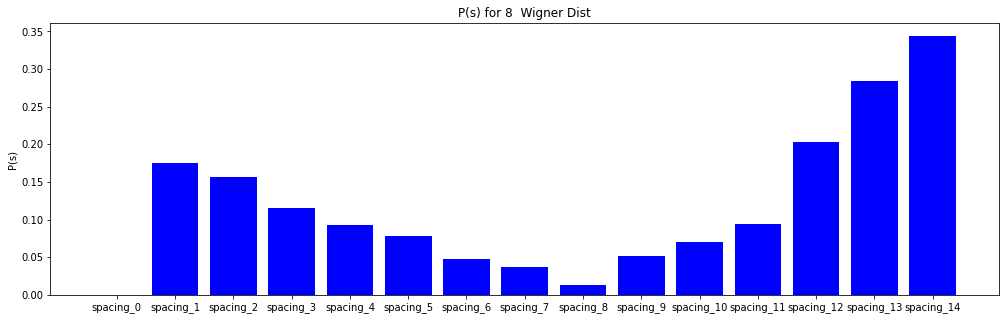

[5.2063598606387684e-05, 0.18781562635595697, 0.16924749126821578, 0.12820661732410762, 0.10618740063018549, 0.09110866037122342, 0.060563028554684775, 0.04999622075816493, 0.013077983915732389, 0.03884421359589863, 0.056871984164168055, 0.08070267910401138, 0.19022670767576225, 0.27175665195147786, 0.3322848084163913]


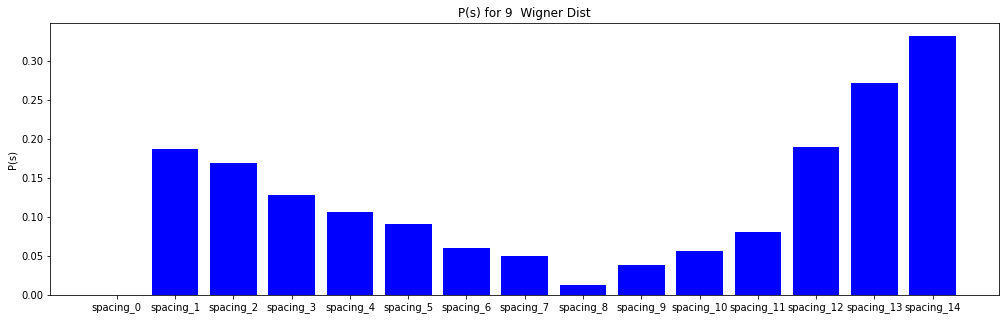

[4.508821406501212e-05, 0.22506543842013157, 0.20677544321728156, 0.16625336863806744, 0.1444590039123249, 0.1295129951035189, 0.09918380122377297, 0.08867561805149635, 0.051897001376090435, 0.03884421359589863, 0.01806591802801089, 0.041984376867842774, 0.15247084849302028, 0.23534578797056813, 0.29725342039030817]


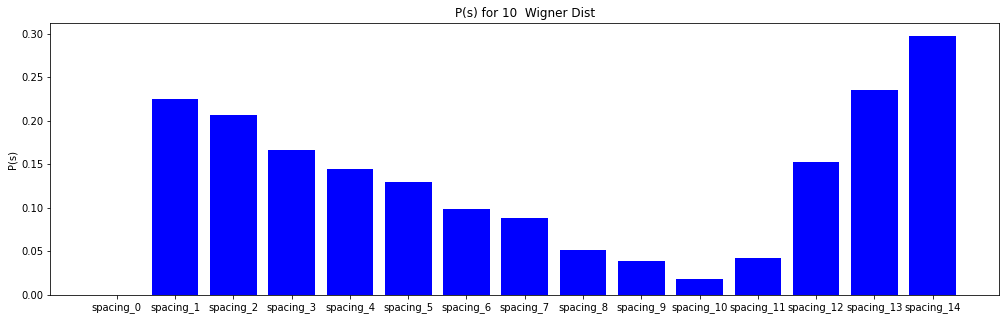

[4.2157152269334826e-05, 0.24217099584270999, 0.22402779732447048, 0.18378595683311544, 0.16211726569390236, 0.14724750731560904, 0.11704854257216944, 0.10657789615775104, 0.06990024480908856, 0.056871984164168055, 0.01806591802801089, 0.023935804147200247, 0.13476220186408946, 0.21818348794721099, 0.28067502721703375]


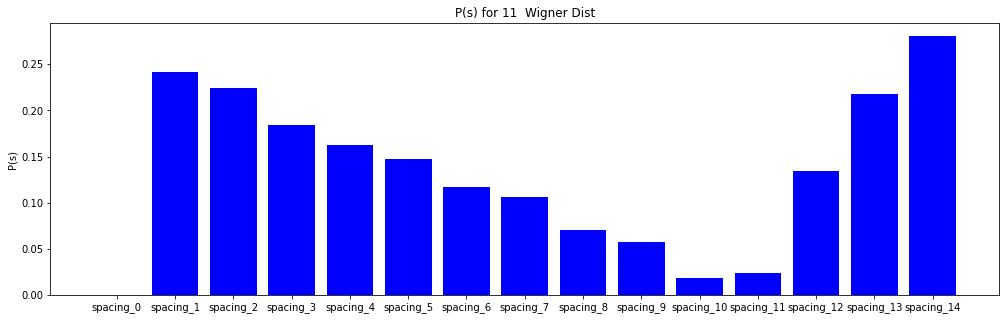

[3.855198563821434e-05, 0.2646049499560562, 0.2466730149670234, 0.20684000642646536, 0.18535820946567688, 0.1706035254768698, 0.1406057607107478, 0.13019481726135146, 0.09368596786647623, 0.08070267910401138, 0.041984376867842774, 0.023935804147200247, 0.11117083593359531, 0.19523752696299237, 0.2584452170464775]


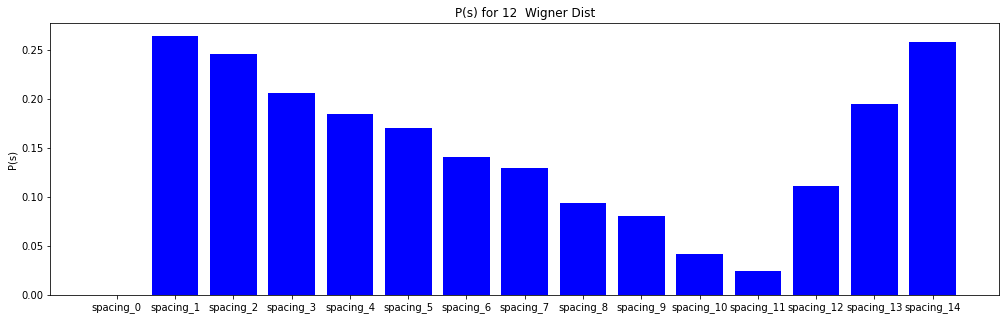

[2.5285018456317193e-05, 0.3650685768421457, 0.34836202800156657, 0.3109766023589668, 0.2906619825460085, 0.27664836648101154, 0.24800764588316454, 0.2380213562931886, 0.20281570475934288, 0.19022670767576225, 0.15247084849302028, 0.13476220186408946, 0.11117083593359531, 0.08586598225130658, 0.15151376265232883]


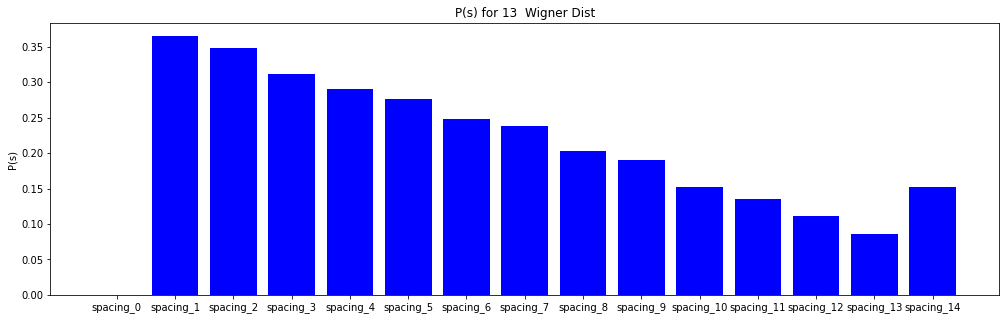

[1.8161699074437774e-05, 0.4369153053997518, 0.42140176874033575, 0.38646774832072905, 0.36736417443789987, 0.35413819973207294, 0.32698950448642733, 0.3174871099100694, 0.28384172586347994, 0.27175665195147786, 0.23534578797056813, 0.21818348794721099, 0.19523752696299237, 0.08586598225130658, 0.0664790920894535]


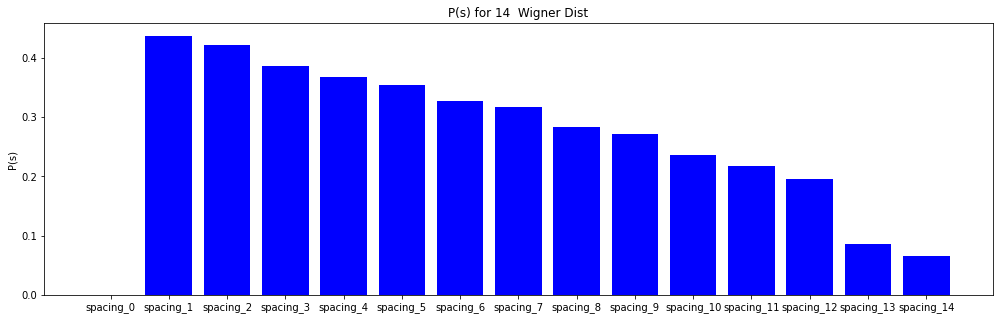

[1.4013329317069123e-05, 0.4884944431598471, 0.4740332794795897, 0.44129397410213084, 0.4232939318385237, 0.41079397421840536, 0.38504209857255794, 0.3759998458943047, 0.34386859034753875, 0.3322848084163913, 0.29725342039030817, 0.28067502721703375, 0.2584452170464775, 0.15151376265232883, 0.0664790920894535]


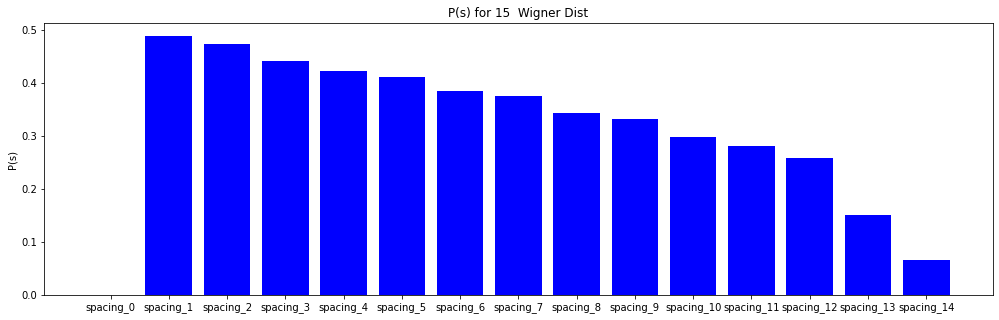

In [30]:
def s_values_nonConsec(eigenvalues):
        overall_s_values = []
        for j in eigenvalues:
            s_values = []
            for y in eigenvalues:
                if(j!=y):
                    if(j>y):
                        s_values.append(j- y)
                    else:
                        s_values.append(y- j)
            overall_s_values.append((s_values))
        return overall_s_values 
s_values_non = s_values_nonConsec(eigenvalues)
#s_values_non_two = s_values_nonConsec(eigenvalues_s_s) #for sorted and scaled
    
def wignerDist(s_vals):
    overall={}
    for x,i in enumerate(s_vals):
        wigner_vals = []
            
        for y,j in enumerate(i):
            val = -abs((pi*math.pow(j,2))/4)
            value = ((math.pi*(j))/2)*(math.pow(e,val))
            wigner_vals.append(value)
                
        overall[x]=wigner_vals
    
    return overall

#wignerDistribution, labels = wignerDist(s_vals) #for non scaled version
wignerDistribution = wignerDist(s_values_non) #for scaled version


def x_and_y(lister):
    x=[]
    y=[]
    for j,i in enumerate(lister):
        x.append('spacing_{}'.format(j))
        y.append(i)
    return x,y
    
def plot(this,title):
    x,y=x_and_y(this)
    fig = plt.figure(figsize = (17, 5))
    plt.bar(x,y,color='blue')
    plt.title("P(s) for {}  Wigner Dist".format(title))
    plt.ylabel('P(s)')
    print(this)
    plt.show()

    
for i in wignerDistribution.keys():
    plot(wignerDistribution[i],i)

[0.023928115443722402, 0.023638036836392328, 0.023015247366666932, 0.022690609853522746, 0.022471800014947522, 0.022036630897423973, 0.021888454353604772, 0.021379478173515955, 0.021202208305412078, 0.020684082763052, 0.02044753096637488, 0.02013825728878805, 0.018756992306193935, 0.0177568893858996, 0.017020047660538207]


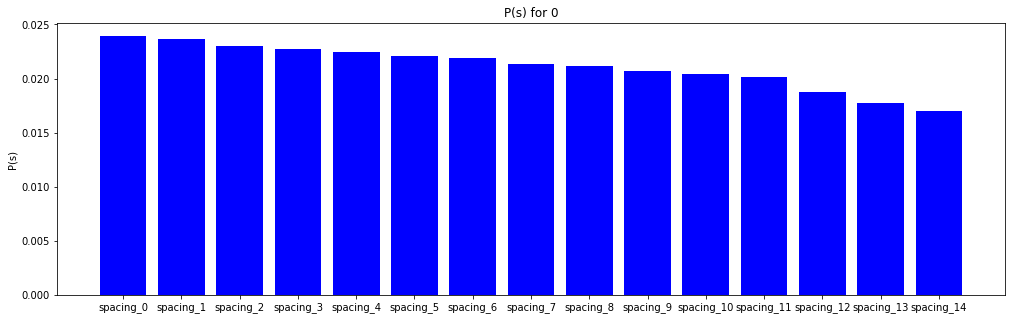

[0.023928115443722402, 0.9878770809171189, 0.9618495623191685, 0.948282362933671, 0.9391378969146125, 0.9209513782751886, 0.9147588076915291, 0.8934877560165279, 0.8860793218454037, 0.864425901475601, 0.8545399663615939, 0.8416148499513931, 0.7838892431921493, 0.742093100798632, 0.7112991284486408]


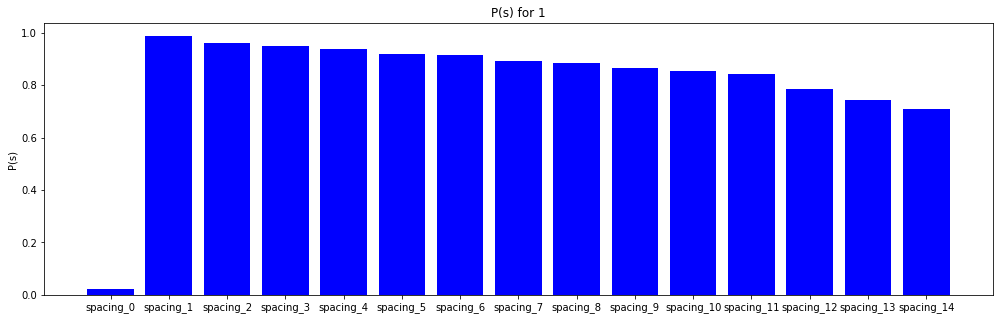

[0.023638036836392328, 0.9878770809171189, 0.973653079820632, 0.9599193880004897, 0.9506627039497078, 0.9322530060320883, 0.9259844421557906, 0.9044523587762938, 0.8969530106142266, 0.8750338662306965, 0.8650266140077484, 0.8519428846046921, 0.7935088872235068, 0.7511998356209383, 0.7200279692573591]


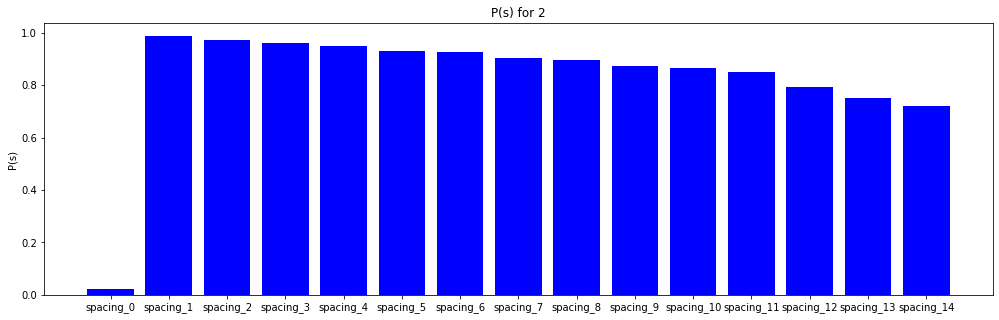

[0.023015247366666932, 0.9618495623191685, 0.973653079820632, 0.9858946763433724, 0.9763875076786492, 0.9574796458342529, 0.9510414554703375, 0.9289267168372883, 0.9212244373318932, 0.8987121638765798, 0.8884341167668315, 0.8749963434220723, 0.8149811300033974, 0.7715272012073598, 0.7395118283711524]


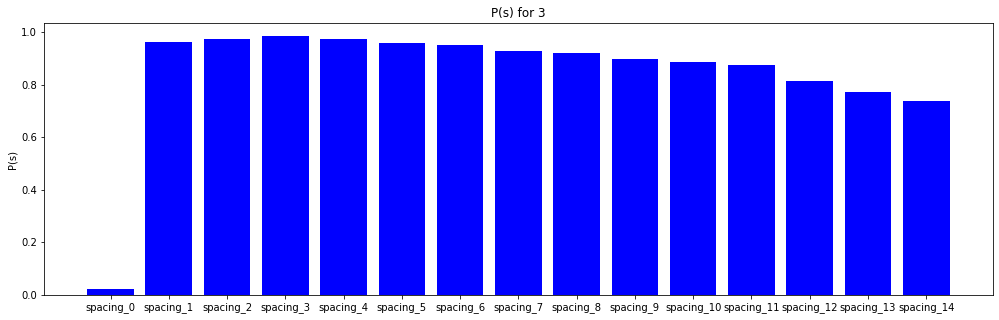

[0.022690609853522746, 0.948282362933671, 0.9599193880004897, 0.9858946763433724, 0.990356811033827, 0.9711784319451757, 0.9646481295524351, 0.9422169924708641, 0.9344045154485087, 0.9115701559621484, 0.9011450594925448, 0.887515030172781, 0.8266411712720839, 0.7825655414520652, 0.7500921205031352]


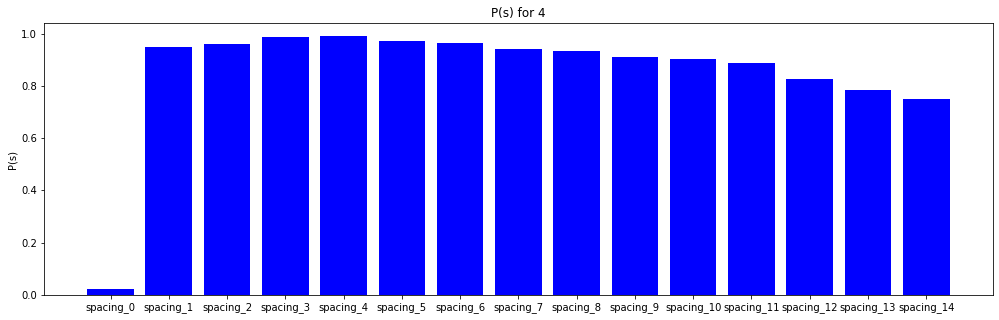

[0.022471800014947522, 0.9391378969146125, 0.9506627039497078, 0.9763875076786492, 0.990356811033827, 0.9806348793939923, 0.97404099088837, 0.9513914399066837, 0.9435028921274242, 0.9204461925299089, 0.9099195860044073, 0.8961568399234917, 0.8346902470526342, 0.7901854490556289, 0.7573958316297325]


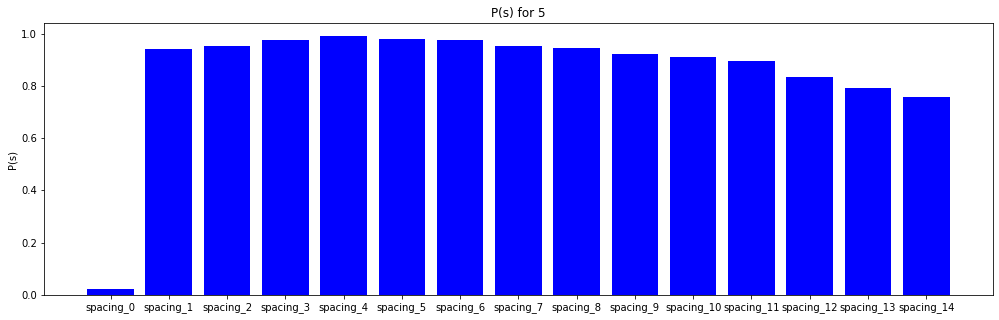

[0.022036630897423973, 0.9209513782751886, 0.9322530060320883, 0.9574796458342529, 0.9711784319451757, 0.9806348793939923, 0.9932758984570311, 0.9701790746976282, 0.9621347475530192, 0.9386227349966599, 0.9278882539510676, 0.9138537275742161, 0.8511733210718058, 0.8057896630639364, 0.7723525315536237]


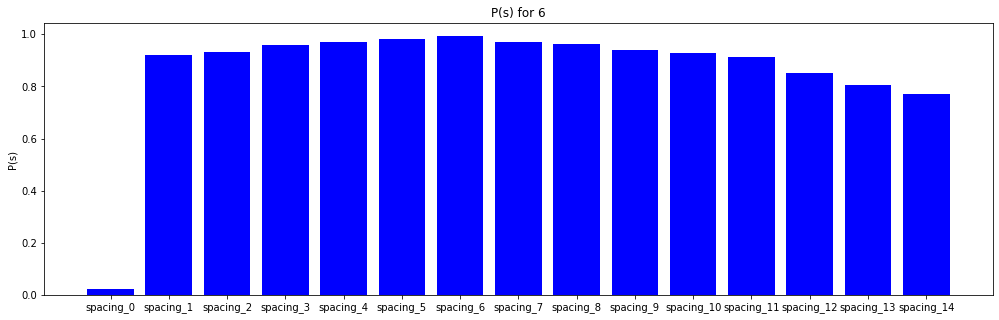

[0.021888454353604772, 0.9147588076915291, 0.9259844421557906, 0.9510414554703375, 0.9646481295524351, 0.97404099088837, 0.9932758984570311, 0.9767468194936756, 0.9686480353017858, 0.9449768553276384, 0.9341697059119851, 0.9200401711083592, 0.8569354419995799, 0.8112445538200026, 0.7775810655965851]


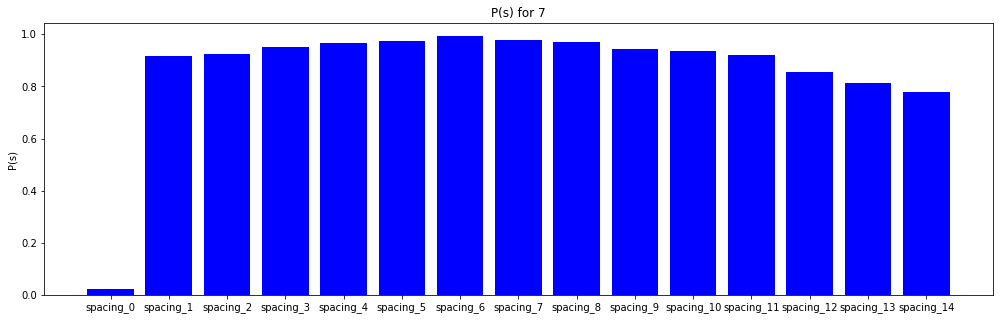

[0.021379478173515955, 0.8934877560165279, 0.9044523587762938, 0.9289267168372883, 0.9422169924708641, 0.9513914399066837, 0.9701790746976282, 0.9767468194936756, 0.9917084099684214, 0.9674736958114631, 0.956409263145836, 0.941943349849133, 0.8773363013803277, 0.8305576610329114, 0.7960927541076267]


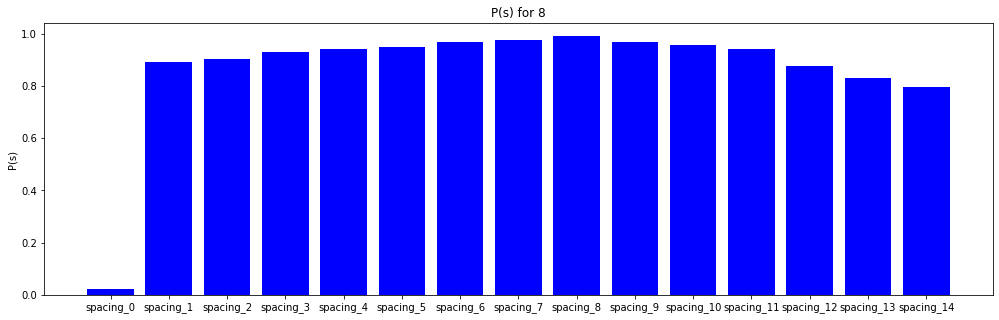

[0.021202208305412078, 0.8860793218454037, 0.8969530106142266, 0.9212244373318932, 0.9344045154485087, 0.9435028921274242, 0.9621347475530192, 0.9686480353017858, 0.9917084099684214, 0.975562661450325, 0.9644057200001869, 0.9498188584274756, 0.8846716358977579, 0.8375018832999093, 0.8027488182065295]


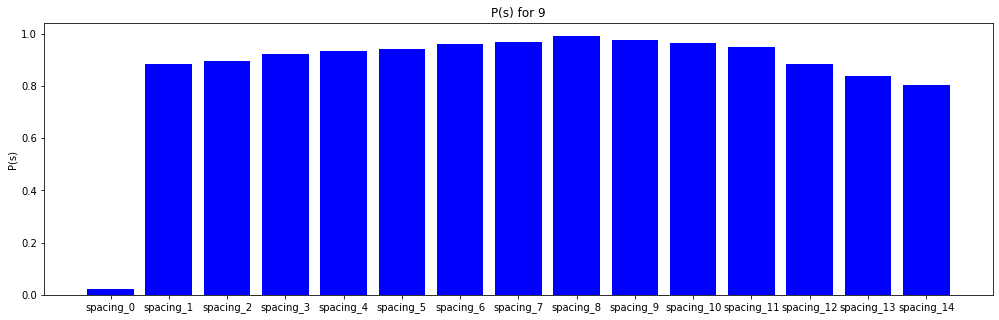

[0.020684082763052, 0.864425901475601, 0.8750338662306965, 0.8987121638765798, 0.9115701559621484, 0.9204461925299089, 0.9386227349966599, 0.9449768553276384, 0.9674736958114631, 0.975562661450325, 0.9885635829547315, 0.9736113280672538, 0.9068322014113952, 0.8584808709825292, 0.8228572596383702]


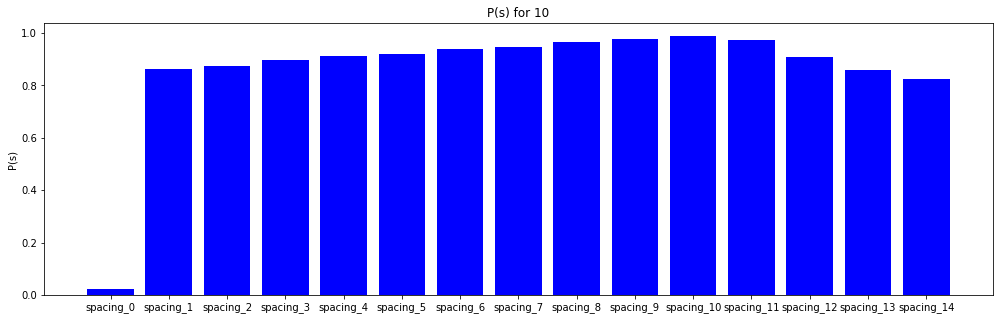

[0.02044753096637488, 0.8545399663615939, 0.8650266140077484, 0.8884341167668315, 0.9011450594925448, 0.9099195860044073, 0.9278882539510676, 0.9341697059119851, 0.956409263145836, 0.9644057200001869, 0.9885635829547315, 0.9848747666358632, 0.9173230908435367, 0.8684123973256266, 0.8323766663333083]


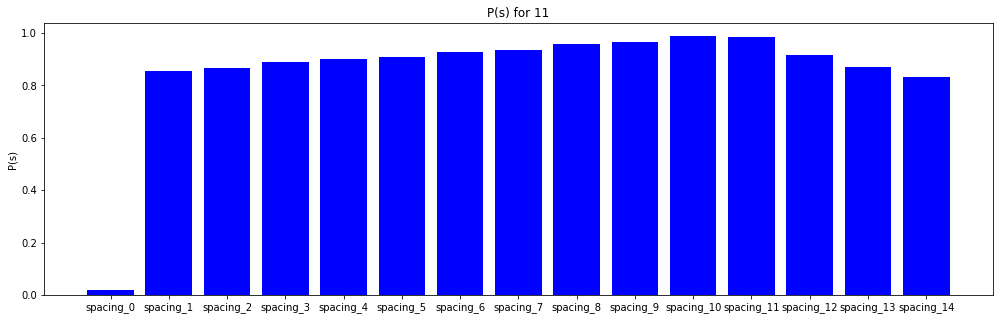

[0.02013825728878805, 0.8416148499513931, 0.8519428846046921, 0.8749963434220723, 0.887515030172781, 0.8961568399234917, 0.9138537275742161, 0.9200401711083592, 0.941943349849133, 0.9498188584274756, 0.9736113280672538, 0.9848747666358632, 0.9314108980342044, 0.8817490575902874, 0.8451599071591019]


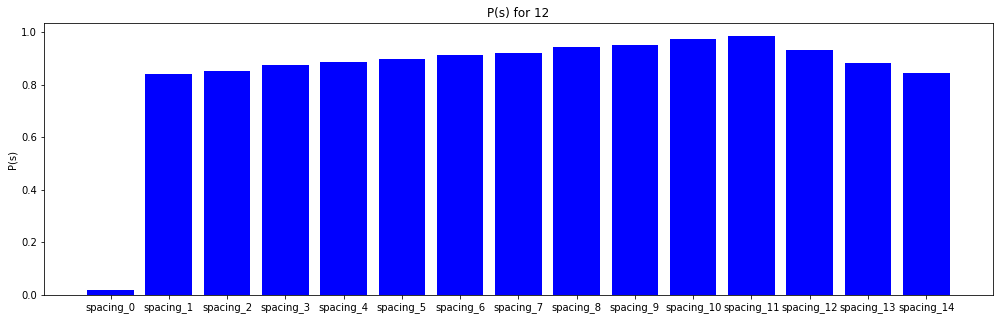

[0.018756992306193935, 0.7838892431921493, 0.7935088872235068, 0.8149811300033974, 0.8266411712720839, 0.8346902470526342, 0.8511733210718058, 0.8569354419995799, 0.8773363013803277, 0.8846716358977579, 0.9068322014113952, 0.9173230908435367, 0.9314108980342044, 0.9466810614426662, 0.9073974858388064]


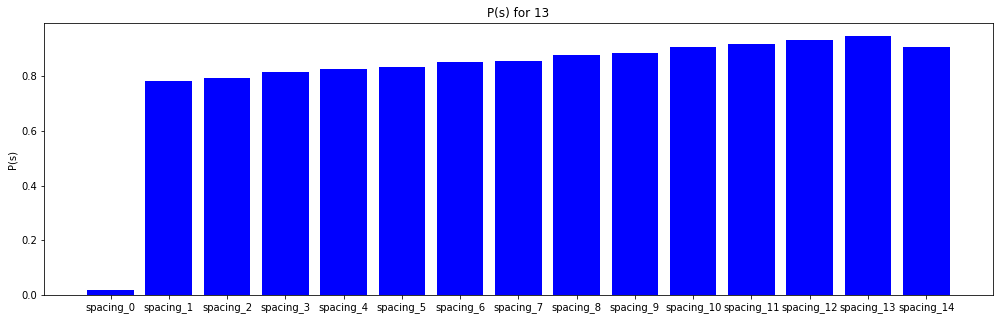

[0.0177568893858996, 0.742093100798632, 0.7511998356209383, 0.7715272012073598, 0.7825655414520652, 0.7901854490556289, 0.8057896630639364, 0.8112445538200026, 0.8305576610329114, 0.8375018832999093, 0.8584808709825292, 0.8684123973256266, 0.8817490575902874, 0.9466810614426662, 0.9585038961865417]


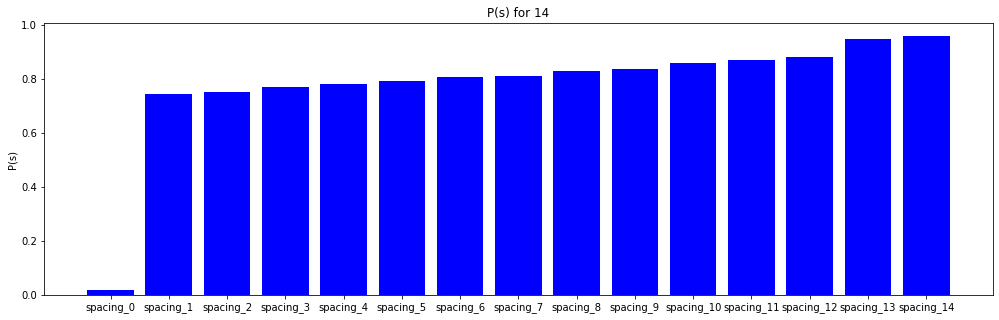

[0.017020047660538207, 0.7112991284486408, 0.7200279692573591, 0.7395118283711524, 0.7500921205031352, 0.7573958316297325, 0.7723525315536237, 0.7775810655965851, 0.7960927541076267, 0.8027488182065295, 0.8228572596383702, 0.8323766663333083, 0.8451599071591019, 0.9073974858388064, 0.9585038961865417]


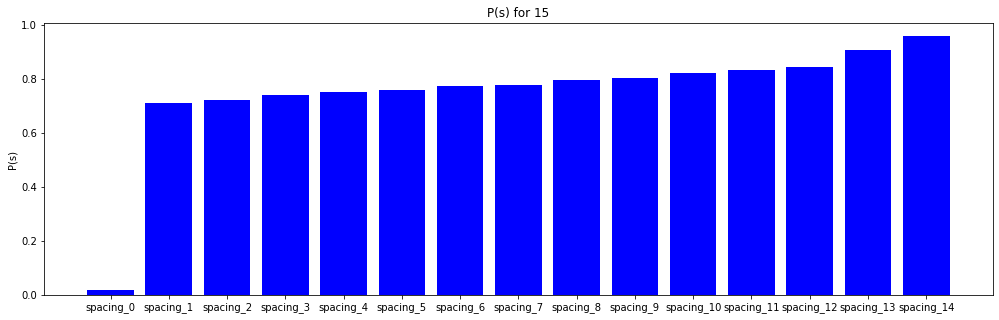

In [31]:
def s_values_nonConsec(eigenvalues):
        overall_s_values = []
        for j in eigenvalues:
            s_values = []
            for y in eigenvalues:
                if(j!=y):
                    if(j>y):
                        s_values.append(j- y)
                    else:
                        s_values.append(y- j)
            overall_s_values.append((s_values))
        return overall_s_values 
s_values_non = s_values_nonConsec(eigenvalues)
#s_values_non_two = s_values_nonConsec(eigenvalues_s_s) #for sorted and scaled
    
def poisson(s_vals):
        overall={}
        for x,i in enumerate(s_vals):
            poisson_vals = []
            
            for y,j in enumerate(i):
                value = (math.pow(e,-abs(j)))
                poisson_vals.append(value)
                
            overall[x]=poisson_vals
        
        return overall
#wignerDistribution, labels = wignerDist(s_vals) #for non scaled version
poissonDistribution = poisson(s_values_non) #for scaled version
    
    
    
def x_and_y(lister):
        x=[]
        y=[]
        for j,i in enumerate(lister):
            x.append('spacing_{}'.format(j))
            y.append(i)
        return x,y
    
def plot(this,title):
        x,y=x_and_y(this)
        fig = plt.figure(figsize = (17, 5))
        plt.bar(x,y,color='blue')
        plt.title("P(s) for {}".format(title))
        plt.ylabel('P(s)')
        print(this)
        plt.show()
    
for i in poissonDistribution.keys():
    plot(poissonDistribution[i],i)